1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [75]:
# https://github.com/guy1997/guy_yagil_matala-_1
from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()

2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-67-a3b0fd96214d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsne_df['label'].replace(0.0, 'Malignant', inplace=True)


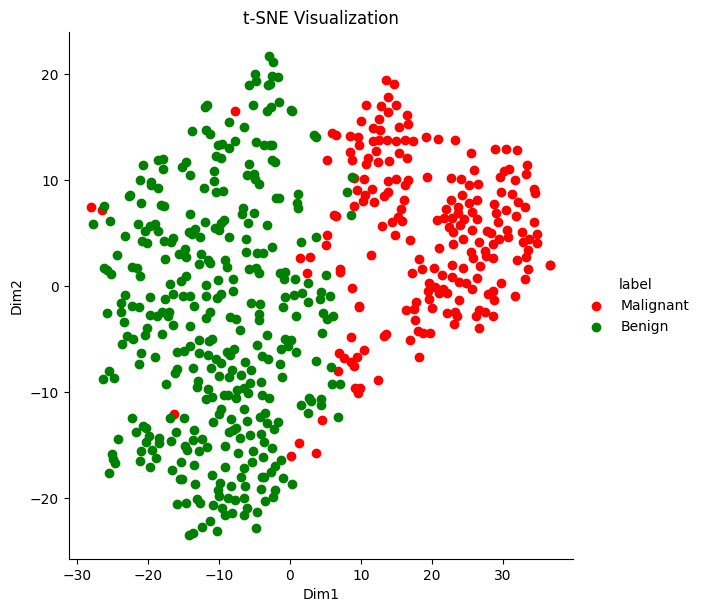

In [67]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer


normalized_data = StandardScaler().fit_transform(my_data.data)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

tsne_data = tsne.fit_transform(normalized_data)

tsne_df = pd.DataFrame(np.vstack((tsne_data.T, my_data.target)).T,
                       columns=['Dim1', 'Dim2', 'label'])

tsne_df['label'].replace(0.0, 'Malignant', inplace=True)
tsne_df['label'].replace(1.0, 'Benign', inplace=True)

pal = dict(Malignant="red", Benign="green")

sns.FacetGrid(tsne_df, hue='label', height=6, palette=pal,
              hue_order=["Malignant", "Benign"]).\
              map(plt.scatter, 'Dim1', 'Dim2').\
              add_legend()

plt.title("t-SNE Visualization")
plt.show()



3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [68]:

from sklearn.model_selection import train_test_split
test_size = 0.33
x,y = my_data.data , my_data.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [69]:
from sklearn.tree import DecisionTreeClassifier


model_decision_tree = DecisionTreeClassifier(max_depth =  1000 )

model_decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1000)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [70]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier( n_estimators = 200)

model_random_forest.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [71]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(learning_rate = 0.5)
model_adaboost.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.5)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(y_true, y_pred, model_name) :
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Confusion Matrix:\n{confusion}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)

    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}


y_pred_decision_tree = model_decision_tree.predict(X_test)
results_dt = evaluate_model(Y_test, y_pred_decision_tree, "Decision Tree")


y_pred_random_forest = model_random_forest.predict(X_test)
results_rf = evaluate_model(Y_test, y_pred_random_forest, "Random Forest")


y_pred_adaboost = model_adaboost.predict(X_test)
results_ab = evaluate_model(Y_test, y_pred_adaboost, "AdaBoost")

results = [results_dt, results_rf, results_ab]


results_df = pd.DataFrame(results)


print("\nModel Evaluation Results:")
print(results_df)


winner = results_df.loc[results_df["F1 Score"].idxmax()]
print("\nWinner Model:")
print(winner)



Metrics for Decision Tree:
  Accuracy: 0.9362
  Confusion Matrix:
[[ 59   5]
 [  7 117]]
  Precision: 0.9590
  Recall: 0.9435
  F1 Score: 0.9512
------------------------------
Metrics for Random Forest:
  Accuracy: 0.9628
  Confusion Matrix:
[[ 60   4]
 [  3 121]]
  Precision: 0.9680
  Recall: 0.9758
  F1 Score: 0.9719
------------------------------
Metrics for AdaBoost:
  Accuracy: 0.9787
  Confusion Matrix:
[[ 62   2]
 [  2 122]]
  Precision: 0.9839
  Recall: 0.9839
  F1 Score: 0.9839
------------------------------

Model Evaluation Results:
           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.936170   0.959016  0.943548  0.951220
1  Random Forest  0.962766   0.968000  0.975806  0.971888
2       AdaBoost  0.978723   0.983871  0.983871  0.983871

Winner Model:
Model        AdaBoost
Accuracy     0.978723
Precision    0.983871
Recall       0.983871
F1 Score     0.983871
Name: 2, dtype: object
